# Recomenda√ß√£o de Characters

## Parte 1: An√°lise e Ajuste de Dados

### Importando o dataset

In [22]:
import pandas as pd
characters = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-08-16/characters.csv')
psych_stats  = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-08-16/psych_stats.csv')
print('Characters: ')
display(characters.head())
print('Psych Stats: ')
display(psych_stats.head())

Characters: 


id            name uni_id uni_name  notability  \
0  F2   Monica Geller      F  Friends        79.7   
1  F1    Rachel Green      F  Friends        76.7   
2  F5   Chandler Bing      F  Friends        74.4   
3  F4  Joey Tribbiani      F  Friends        74.3   
4  F3   Phoebe Buffay      F  Friends        72.6   

                                                link  \
0  https://openpsychometrics.org/tests/characters...   
1  https://openpsychometrics.org/tests/characters...   
2  https://openpsychometrics.org/tests/characters...   
3  https://openpsychometrics.org/tests/characters...   
4  https://openpsychometrics.org/tests/characters...   

                                          image_link  
0  https://openpsychometrics.org/tests/characters...  
1  https://openpsychometrics.org/tests/characters...  
2  https://openpsychometrics.org/tests/characters...  
3  https://openpsychometrics.org/tests/characters...  
4  https://openpsychometrics.org/tests/characters...

Psych Stats: 


char_id      char_name uni_id uni_name                       question  \
0      F2  Monica Geller      F  Friends                     messy/neat   
1      F2  Monica Geller      F  Friends  disorganized/self-disciplined   
2      F2  Monica Geller      F  Friends                  diligent/lazy   
3      F2  Monica Geller      F  Friends                  on-time/tardy   
4      F2  Monica Geller      F  Friends        competitive/cooperative   

        personality  avg_rating  rank  rating_sd  number_ratings  
0              neat        95.7     9       11.7            1079  
1  self-disciplined        95.2    27       11.2            1185  
2          diligent        93.9    87       10.4            1166  
3           on-time        93.8    34       14.3             236  
4       competitive        93.6    56       13.4            1168

Explicando as notas de cada personagem:
- **question**: Pergunta se um personagem tem mais "um tra√ßo ou outro" (por exemplo, "Voc√™ √© mais desorganizado ou disciplinado?").
- **personality**: O tra√ßo de personalidade do personagem (por exemplo, "desorganizado" ou "disciplinado").
- **avg_rating**: A nota m√©dia do personagem para aquele tra√ßo de personalidade, de 0 a 100. Por exemplo, se o personagem √© "disciplinado", a nota m√©dia √© 95.2

O √∫nico problema √© que se o personagem √© mais "disciplinado" do que "desorganizado", n√£o h√° uma nota para "desorganizado".

In [23]:
psych_stats[(psych_stats['char_name'] == 'Monica Geller') & (psych_stats['question'] == 'disorganized/self-disciplined')]

char_id      char_name uni_id uni_name                       question  \
1      F2  Monica Geller      F  Friends  disorganized/self-disciplined   

        personality  avg_rating  rank  rating_sd  number_ratings  
1  self-disciplined        95.2    27       11.2            1185

In [24]:
psych_stats[(psych_stats['char_name'] == 'Rachel Green') & (psych_stats['question'] == 'disorganized/self-disciplined')]

char_id     char_name uni_id uni_name                       question  \
504      F1  Rachel Green      F  Friends  disorganized/self-disciplined   

      personality  avg_rating  rank  rating_sd  number_ratings  
504  disorganized        74.1   185       22.7            1159

Ent√£o temos que padronizar as notas para que todos os personagens tenham uma nota para cada tra√ßo de personalidade.
Perceba que a M√¥nica tem nota m√©dia 95.2 para "disciplinado", mas n√£o tem nota para "desorganizado". J√° a Rachel tem nota m√©dia 74.1 para "desorganizado", mas n√£o tem nota para "disciplinado".

Para corrigir isso, vamos corrigir as notas de cada personagem, de forma que a refer√™ncia seja sempre:
Exemplo: Para a question "disorganized/self-disciplined":	
- Se o personagem √© mais "disciplinado" do que "desorganizado", n√£o vamos alterar a nota.
- Se o personagem √© mais "desorganizado" do que "disciplinado", vamos alterar a nota para 100 - nota m√©dia do personagem.

In [25]:
psych_stats[(psych_stats['uni_name'] == 'Friends') & (psych_stats['question'] == 'disorganized/self-disciplined')]

char_id       char_name uni_id uni_name                       question  \
1         F2   Monica Geller      F  Friends  disorganized/self-disciplined   
504       F1    Rachel Green      F  Friends  disorganized/self-disciplined   
1047      F5   Chandler Bing      F  Friends  disorganized/self-disciplined   
1237      F4  Joey Tribbiani      F  Friends  disorganized/self-disciplined   
1730      F3   Phoebe Buffay      F  Friends  disorganized/self-disciplined   
2109      F6     Ross Geller      F  Friends  disorganized/self-disciplined   

           personality  avg_rating  rank  rating_sd  number_ratings  
1     self-disciplined        95.2    27       11.2            1185  
504       disorganized        74.1   185       22.7            1159  
1047      disorganized        57.6   443       29.0            1133  
1237      disorganized        89.0    24       13.6            1210  
1730      disorganized        79.1   117       23.3            1121  
2109  self-disciplined        75.6   744       27.0            1144

Al√©m disso, vamos dividir a nota por 2, para que a nota m√©dia fique entre 0 e 50, para ser condizente com a escala das notas da Blooma, que s√£o de 0 a 50 tamb√©m.

In [26]:
def correct_rating(row):
    left, right = row["question"].split("/", 1)
    avg = row["avg_rating"]
    personality = row["personality"]

    if personality == left:
        corrected = (100 - avg)/2
    else:
        corrected = avg/2

    return corrected

psych_stats['avg_rating'] = psych_stats.apply(correct_rating, axis=1)

In [27]:
psych_stats[(psych_stats['uni_name'] == 'Friends') & (psych_stats['question'] == 'disorganized/self-disciplined')]

char_id       char_name uni_id uni_name                       question  \
1         F2   Monica Geller      F  Friends  disorganized/self-disciplined   
504       F1    Rachel Green      F  Friends  disorganized/self-disciplined   
1047      F5   Chandler Bing      F  Friends  disorganized/self-disciplined   
1237      F4  Joey Tribbiani      F  Friends  disorganized/self-disciplined   
1730      F3   Phoebe Buffay      F  Friends  disorganized/self-disciplined   
2109      F6     Ross Geller      F  Friends  disorganized/self-disciplined   

           personality  avg_rating  rank  rating_sd  number_ratings  
1     self-disciplined       47.60    27       11.2            1185  
504       disorganized       12.95   185       22.7            1159  
1047      disorganized       21.20   443       29.0            1133  
1237      disorganized        5.50    24       13.6            1210  
1730      disorganized       10.45   117       23.3            1121  
2109  self-disciplined       37.80   744       27.0            1144

Agora est√° mais f√°cil de ler, certo? Se o personagem √© mais "disciplinado" do que "desorganizado", a nota dele necessariamente ser√° maior que 25. Observe o dataframe acima em rela√ß√£o ao dataframe antigo.

## Selecionando quais perguntas s√£o relevantes para o nosso teste de Big 5

Aqui, pedi para o chatgpt me ajudar a selecionar quais perguntas s√£o relevantes para o nosso teste de Big 5. √â algo interessante para a valida√ß√£o da Carol/Psic√≥loga. Para extrovers√£o, Socializa√ß√£o, Conscienciosidade, Estabilidade Emocional e Abertura a Experi√™ncias, selecionamos:

In [28]:
import numpy as np
BIG5_ITEMS = {
    # ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ EXTROVERS√ÉO ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    "Extrovers√£o": {
        "loud/quiet":               0.68,
        "chatty/reserved":          0.75,
        "assertive/passive":        0.64,
        "fast-talking/slow-talking":0.55,
        "bold/shy":                 0.72,
        "reclusive/social":         0.70, 
        "dominant/submissive":      0.60,
        "expressive/stoic":         0.59,
        "exuberant/subdued":        0.63,
        "extrovert/introvert":      0.90,
    },

    # ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ SOCIALIZA√á√ÉO / AMABILIDADE ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    "Socializa√ß√£o": {
        "kind/cruel":               0.74,
        "loyal/traitorous":         0.66,
        "supportive/catty":         0.70,
        "nurturing/poisonous":      0.65,
        "forgiving/vengeful":       0.71,
        "accommodating/stubborn":   0.62,
        "giving/receiving":         0.67,
        "accepting/judgemental":    0.69,
        "respectful/rude":          0.73,
        "competitive/cooperative":  0.60,
    },

    # ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ CONSCIENCIO-SIDADE ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    "Conscienciosidade": {
        "diligent/lazy":                 0.76,
        "disorganized/self-disciplined": 0.78,  # self-disciplined = alto
        "on-time/tardy":                 0.66,
        "precise/vague":                 0.64,
        "scheduled/spontaneous":         0.60,
        "chaotic/orderly":               0.71,  # orderly = alto
        "motivated/unmotivated":         0.70,
        "workaholic/slacker":            0.72,
        "persistent/quitter":            0.69,
        "consistent/variable":           0.58,
    },

    # ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ ESTABILIDADE EMOCIONAL ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    "Estabilidade emocional": {
        "anxious/calm":        0.76,
        "tense/relaxed":       0.72,
        "moody/stable":        0.70,
        "impatient/patient":   0.62,
        "confident/insecure":  0.68,
        "uptight/easy":        0.64,
        "hypochondriac/stoic": 0.57,
        "bright/depressed":    0.60,
    },

    # ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ ABERTURA √Ä EXPERI√äNCIA ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    "Abertura √† experi√™ncia": {
        "imaginative/practical":              0.78,
        "creative/conventional":              0.74,
        "abstract/concrete":                  0.68,
        "adventurous/stick-in-the-mud":       0.72,
        "open to new experinces/uncreative":  0.77,
        "traditional/unorthodox":             0.71,  # unorthodox = alto
        "experimental/reliable":              0.64,
        "fantastical/realistic":              0.64,
        "routine/innovative":                 0.66,  # innovative = alto
        "flexible/rigid":                     0.63,
    },
}

# C√°lculo das m√©dias por tra√ßos do Big 5:
ratings_wide = psych_stats.pivot_table(index="char_name",
                                       columns="question",
                                       values="avg_rating")

# Para cada tra√ßo, calcula a m√©dia ponderada das perguntas dispon√≠veis
for trait, questions in BIG5_ITEMS.items():
    w = pd.Series(questions)
    comuns = w.index.intersection(ratings_wide.columns)
    if comuns.empty:
        # Se n√£o houver perguntas desse tra√ßo, preenche com NaN
        characters[trait] = np.nan
        continue
    w = w[comuns]
    # Calcula a m√©dia ponderada para cada personagem
    trait_scores = (ratings_wide[comuns] * w).sum(axis=1) / w.sum()
    # Atribui os valores ao DataFrame characters, alinhando pelo nome do personagem
    characters.loc[characters['name'].isin(trait_scores.index), trait] = characters['name'].map(trait_scores)

characters
# Verifica se a pergunta j√° existe no DataFrame

id                   name uni_id               uni_name  notability  \
0       F2          Monica Geller      F                Friends        79.7   
1       F1           Rachel Green      F                Friends        76.7   
2       F5          Chandler Bing      F                Friends        74.4   
3       F4         Joey Tribbiani      F                Friends        74.3   
4       F3          Phoebe Buffay      F                Friends        72.6   
..     ...                    ...    ...                    ...         ...   
884  SBSP1  SpongeBob SquarePants   SBSP  SpongeBob SquarePants        78.6   
885  SBSP4              Mr. Krabs   SBSP  SpongeBob SquarePants        73.9   
886  SBSP5           Sandy Cheeks   SBSP  SpongeBob SquarePants        66.9   
887  SBSP2           Patrick Star   SBSP  SpongeBob SquarePants        61.2   
888  SBSP3    Squidward Tentacles   SBSP  SpongeBob SquarePants        52.5   

                                                  link  \
0    https://openpsychometrics.org/tests/characters...   
1    https://openpsychometrics.org/tests/characters...   
2    https://openpsychometrics.org/tests/characters...   
3    https://openpsychometrics.org/tests/characters...   
4    https://openpsychometrics.org/tests/characters...   
..                                                 ...   
884  https://openpsychometrics.org/tests/characters...   
885  https://openpsychometrics.org/tests/characters...   
886  https://openpsychometrics.org/tests/characters...   
887  https://openpsychometrics.org/tests/characters...   
888  https://openpsychometrics.org/tests/characters...   

                                            image_link  Extrovers√£o  \
0    https://openpsychometrics.org/tests/characters...    14.634467   
1    https://openpsychometrics.org/tests/characters...    14.798595   
2    https://openpsychometrics.org/tests/characters...    20.574408   
3    https://openpsychometrics.org/tests/characters...    13.818861   
4    https://openpsychometrics.org/tests/characters...    12.308728   
..                                                 ...          ...   
884  https://openpsychometrics.org/tests/characters...    12.926627   
885  https://openpsychometrics.org/tests/characters...    12.531805   
886  https://openpsychometrics.org/tests/characters...    11.875000   
887  https://openpsychometrics.org/tests/characters...    18.926331   
888  https://openpsychometrics.org/tests/characters...    32.977367   

     Socializa√ß√£o  Conscienciosidade  Estabilidade emocional  \
0       20.861069          14.647141               14.373155   
1       26.896435          24.250000               14.297455   
2       20.672608          24.370507               21.070356   
3       16.519418          26.873203               18.636896   
4       15.640338          23.884886               17.198601   
..            ...                ...                     ...   
884     11.528330          14.820180               12.241221   
885     36.570356          18.291176               15.578244   
886     15.704128          16.547386               18.422901   
887     19.745779          27.871242               16.027735   
888     37.432083          27.345670               21.407125   

     Abertura √† experi√™ncia  
0                 34.603321  
1                 19.411580  
2                 27.095422  
3                 13.088779  
4                 10.012478  
..                      ...  
884               10.847397  
885               30.766786  
886               19.375404  
887               13.306643  
888               35.538600  

[889 rows x 12 columns]

### Vendo as distribui√ß√µes de tra√ßos de personalidade

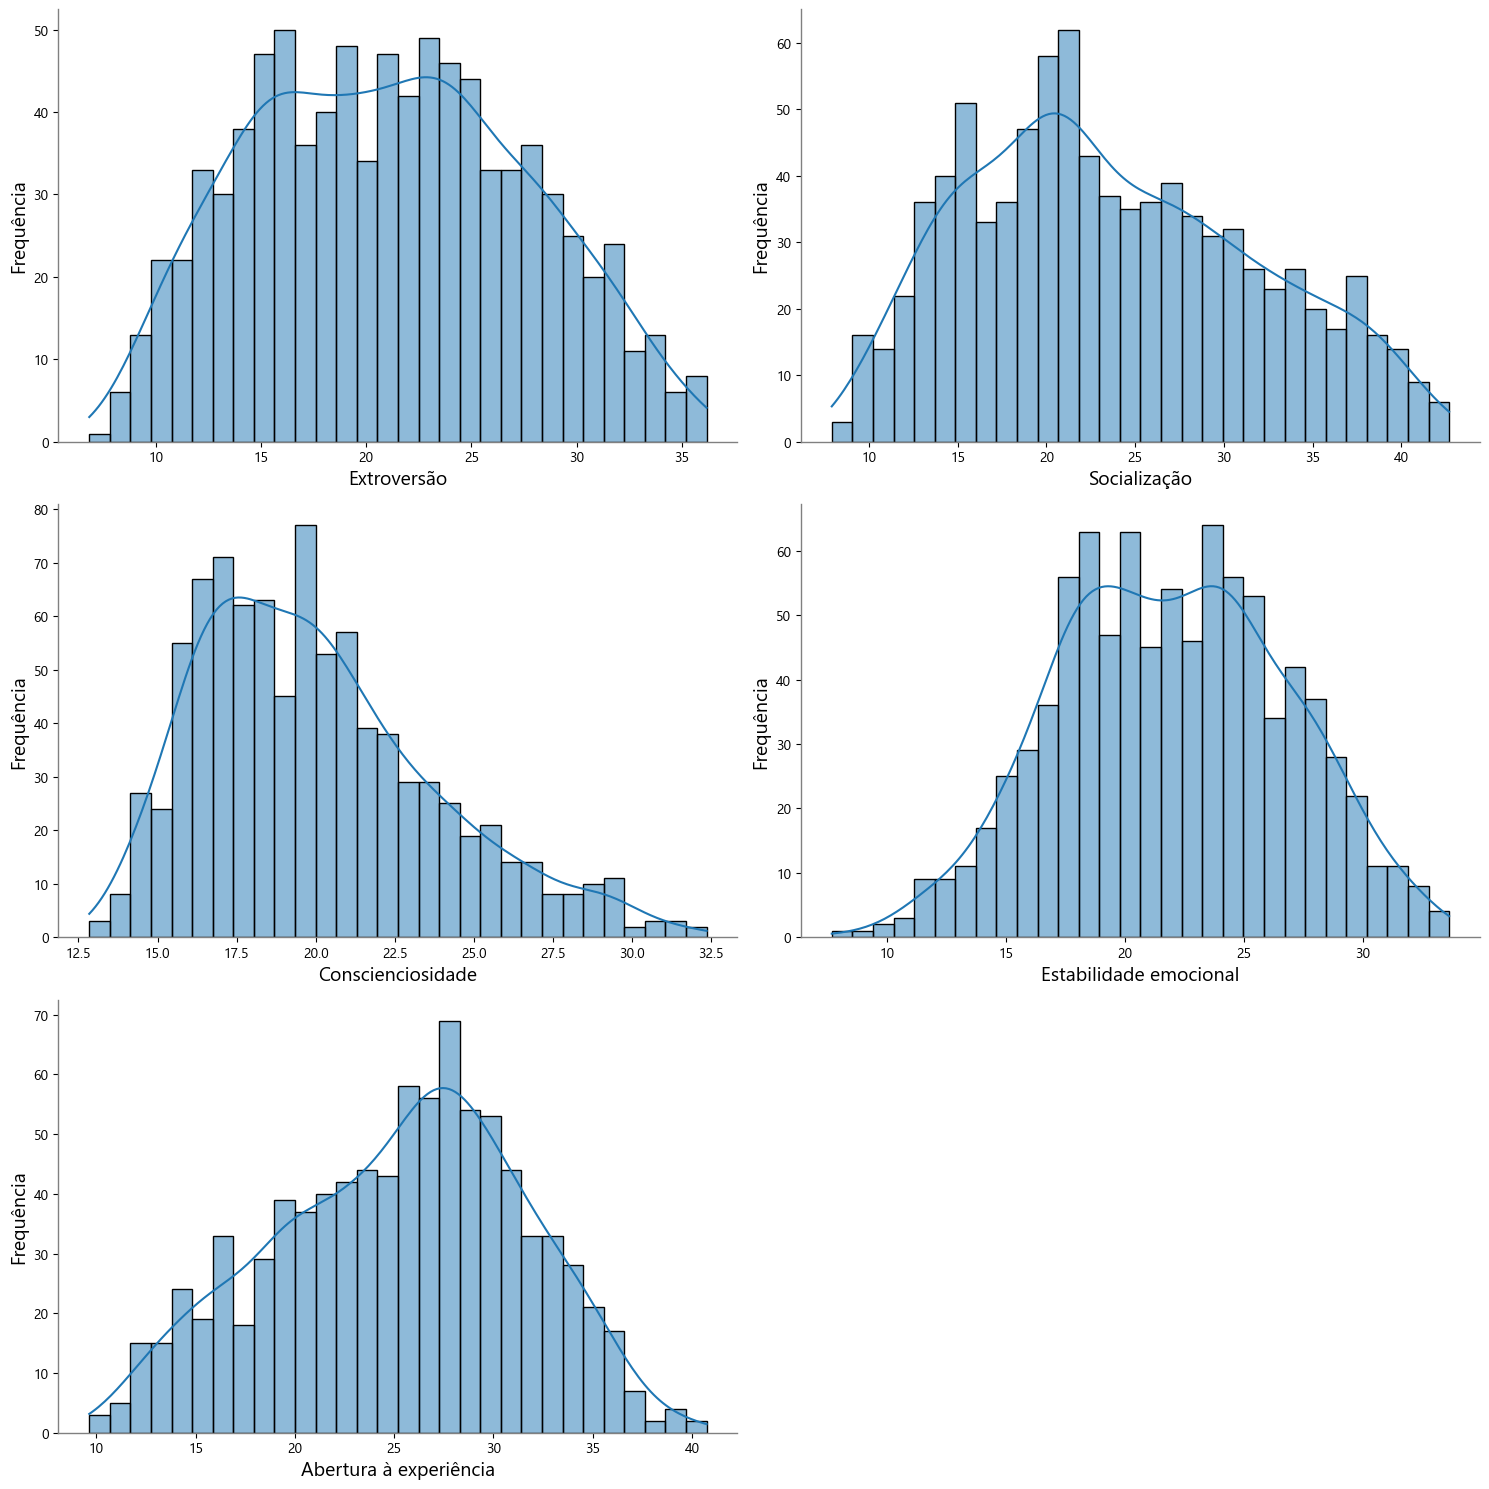

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# extrovers√£o:
tracos = list(BIG5_ITEMS.keys())

cols = 2
rows = math.ceil(len(tracos) / cols)          

fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
axes = axes.flatten()      
plt.rcParams['font.family'] = 'Segoe UI'                   

for i, trait in enumerate(tracos):
    ax = axes[i]
    sns.histplot(characters[trait].dropna(), kde=True, ax=ax, bins=30)
    sns.despine(ax=ax)
    ax.set_ylabel('Frequ√™ncia', fontsize=14) 
    ax.set_xlabel(f'{trait}', fontsize=14)  
    
    ax.spines['bottom'].set_color('gray')
    ax.spines['left'].set_color('gray')
    ax.spines['top'].set_color('gray')
    ax.spines['right'].set_color('gray')
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)
    ax.spines['top'].set_linewidth(1)
    ax.spines['right'].set_linewidth(1)                    

for j in range(len(tracos), len(axes)):
    fig.delaxes(axes[j])                      

plt.tight_layout()
plt.show()

### Verificando as caracter√≠sticas principais de cada personagem

In [30]:
def extract_top_tags(df):
    return (
        df.sort_values("rank")
          .head(8)["personality"]
          .tolist()
    )

# Agrupar por personagem e aplicar a fun√ß√£o de extra√ß√£o
top_tags = (
    psych_stats.groupby("char_name")
    .apply(extract_top_tags)
    .apply(lambda tags: ", ".join(tags))
    .rename("tags")
)

# Adiciona a coluna 'tags' ao DataFrame characters
characters["Tags"] = characters["name"].map(top_tags)

C:\Users\fealp\AppData\Local\Temp\ipykernel_12388\537633282.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(extract_top_tags)


### Verificando as s√©ries mais populares

In [31]:
avaliacoes_por_serie = (
    psych_stats.groupby("uni_name")["number_ratings"]
    .mean()
    .sort_values(ascending=False)
    .rename("media_avaliacoes")
)

# Exibe o top 10 (ou quantos quiser)
avaliacoes_por_serie.head(10)

uni_name
The Lion King                784.600998
Friends                      682.299667
Pirates of the Carribean     553.738570
Star Wars                    518.839152
Sherlock                     456.524522
Mean Girls                   399.094015
Marvel Cinematic Universe    348.863508
Grey's Anatomy               315.952618
Parks and Recreation         314.216708
The Office                   297.090441
Name: media_avaliacoes, dtype: float64

In [32]:
characters.drop(columns=['id', 'uni_id'], inplace=True)
characters.rename(columns={'name': 'Personagem', 'uni_name': 'Universo'}, inplace=True)

characters.to_excel('characters_big5.xlsx', index=False)
characters.head()

Personagem Universo  notability  \
0   Monica Geller  Friends        79.7   
1    Rachel Green  Friends        76.7   
2   Chandler Bing  Friends        74.4   
3  Joey Tribbiani  Friends        74.3   
4   Phoebe Buffay  Friends        72.6   

                                                link  \
0  https://openpsychometrics.org/tests/characters...   
1  https://openpsychometrics.org/tests/characters...   
2  https://openpsychometrics.org/tests/characters...   
3  https://openpsychometrics.org/tests/characters...   
4  https://openpsychometrics.org/tests/characters...   

                                          image_link  Extrovers√£o  \
0  https://openpsychometrics.org/tests/characters...    14.634467   
1  https://openpsychometrics.org/tests/characters...    14.798595   
2  https://openpsychometrics.org/tests/characters...    20.574408   
3  https://openpsychometrics.org/tests/characters...    13.818861   
4  https://openpsychometrics.org/tests/characters...    12.308728   

   Socializa√ß√£o  Conscienciosidade  Estabilidade emocional  \
0     20.861069          14.647141               14.373155   
1     26.896435          24.250000               14.297455   
2     20.672608          24.370507               21.070356   
3     16.519418          26.873203               18.636896   
4     15.640338          23.884886               17.198601   

   Abertura √† experi√™ncia                                               Tags  
0               34.603321  OCD, neat, washed, orderly, good-cook, hoarder...  
1               19.411580  bad-cook, trendy, modern, mainstream, cosmopol...  
2               27.095422  comedic, ironic, sarcastic, ü§£, funny, ü§°, üõå, he...  
3               13.088779  nonpolitical, Italian, relaxed, üòé, simple, pla...  
4               10.012478  artistic, open to new experinces, abstract, im...

### Salvando os characteres com as altera√ß√µes

## Parte 2: Recomenda√ß√£o de Characters

In [53]:
characters = pd.read_excel('characters_big5.xlsx')
characters.head()

Personagem Universo  notability  \
0   Monica Geller  Friends        79.7   
1    Rachel Green  Friends        76.7   
2   Chandler Bing  Friends        74.4   
3  Joey Tribbiani  Friends        74.3   
4   Phoebe Buffay  Friends        72.6   

                                                link  \
0  https://openpsychometrics.org/tests/characters...   
1  https://openpsychometrics.org/tests/characters...   
2  https://openpsychometrics.org/tests/characters...   
3  https://openpsychometrics.org/tests/characters...   
4  https://openpsychometrics.org/tests/characters...   

                                          image_link  Extrovers√£o  \
0  https://openpsychometrics.org/tests/characters...    14.634467   
1  https://openpsychometrics.org/tests/characters...    14.798595   
2  https://openpsychometrics.org/tests/characters...    20.574408   
3  https://openpsychometrics.org/tests/characters...    13.818861   
4  https://openpsychometrics.org/tests/characters...    12.308728   

   Socializa√ß√£o  Conscienciosidade  Estabilidade emocional  \
0     20.861069          14.647141               14.373155   
1     26.896435          24.250000               14.297455   
2     20.672608          24.370507               21.070356   
3     16.519418          26.873203               18.636896   
4     15.640338          23.884886               17.198601   

   Abertura √† experi√™ncia                                               Tags  
0               34.603321  OCD, neat, washed, orderly, good-cook, hoarder...  
1               19.411580  bad-cook, trendy, modern, mainstream, cosmopol...  
2               27.095422  comedic, ironic, sarcastic, ü§£, funny, ü§°, üõå, he...  
3               13.088779  nonpolitical, Italian, relaxed, üòé, simple, pla...  
4               10.012478  artistic, open to new experinces, abstract, im...

### Limpeza e Normaliza√ß√£o dos Dados

In [54]:
from sklearn.preprocessing import MinMaxScaler

trait_cols = ["Extrovers√£o","Socializa√ß√£o","Conscienciosidade",
              "Estabilidade emocional","Abertura √† experi√™ncia"]

characters[trait_cols] = characters[trait_cols].apply(pd.to_numeric, errors="coerce")

characters.drop_duplicates(subset="Personagem", inplace=True)
characters.dropna(subset=trait_cols, inplace=True)


# fazendo uma normaliza√ß√£o m√°x e m√≠n
scaler = MinMaxScaler(feature_range=(-1, 1))
personagens = characters.copy()
personagens.loc[:, trait_cols] = scaler.fit_transform(characters[trait_cols])

personagens.head()

Personagem Universo  notability  \
0   Monica Geller  Friends        79.7   
1    Rachel Green  Friends        76.7   
2   Chandler Bing  Friends        74.4   
3  Joey Tribbiani  Friends        74.3   
4   Phoebe Buffay  Friends        72.6   

                                                link  \
0  https://openpsychometrics.org/tests/characters...   
1  https://openpsychometrics.org/tests/characters...   
2  https://openpsychometrics.org/tests/characters...   
3  https://openpsychometrics.org/tests/characters...   
4  https://openpsychometrics.org/tests/characters...   

                                          image_link  Extrovers√£o  \
0  https://openpsychometrics.org/tests/characters...    -0.468132   
1  https://openpsychometrics.org/tests/characters...    -0.456952   
2  https://openpsychometrics.org/tests/characters...    -0.063505   
3  https://openpsychometrics.org/tests/characters...    -0.523691   
4  https://openpsychometrics.org/tests/characters...    -0.626561   

   Socializa√ß√£o  Conscienciosidade  Estabilidade emocional  \
0     -0.255182          -0.815037               -0.484073   
1      0.091668           0.169315               -0.489903   
2     -0.266012           0.181668                0.031718   
3     -0.504694           0.438209               -0.155697   
4     -0.555215           0.131889               -0.266469   

   Abertura √† experi√™ncia                                               Tags  
0                0.605653  OCD, neat, washed, orderly, good-cook, hoarder...  
1               -0.371904  bad-cook, trendy, modern, mainstream, cosmopol...  
2                0.122535  comedic, ironic, sarcastic, ü§£, funny, ü§°, üõå, he...  
3               -0.778762  nonpolitical, Italian, relaxed, üòé, simple, pla...  
4               -0.976716  artistic, open to new experinces, abstract, im...

Vamos determinar **quantos vizinhos ( *K* )** e **qual peso ( *Œ±* )** usar na nossa m√©trica h√≠brida para recomenda√ß√µes de personagens parecidos com base no Big 5.

### Passos a seguir

1. Usamos as cinco notas do Big 5, j√° padronizadas, como vetores em 5 D. Padronizar tira vi√©s de escala entre tra√ßos.

2. Definir duas dist√¢ncias-base: *Cosine* (dire√ß√£o) e *Euclidiana* (intensidade). Cada uma captura um aspecto diferente de similaridade psicol√≥gica.

3. M√©trica h√≠brida**: $$d_\text{mix} = \alpha\;d_\text{cos} \;+\; (1-\alpha)\; \tilde d_\text{euc}$$ onde $\tilde d_\text{euc}$ est√° normalizada em \([0,1]\). Combina **propor√ß√£o** entre tra√ßos (cosseno) com **diferen√ßa absoluta** (euclidiana).

4. Treinamos `NearestNeighbors(metric='precomputed')` sobre a matriz $D_\text{mix}$. Facilita experimentar v√°rios Œ± sem recalcular √≠ndices vetoriais.

5. Curva do "cotovelo": Para cada Œ±, calculamos a **dist√¢ncia m√©dia** ao vizinho *k*-√©simo e plotamos $\bar d_k \times k$. O ‚Äúcotovelo‚Äù √© o ponto onde a curva deixa de achatar ‚áí limite at√© onde ainda h√° vizinhos realmente pr√≥ximos.


- Por que cosine? por que euclidiana?

* **Cosine distance** \((1-\cos\theta)\) mede apenas a **dire√ß√£o** do vetor: dois perfis com a mesma raz√£o de tra√ßos, mesmo que um seja ‚Äúmais intenso‚Äù, ficar√£o pr√≥ximos.  
* **Euclidean distance** mede a **intensidade absoluta**: um usu√°rio 80-80-80 n√£o √© parecido com 40-40-40 porque a norma difere.

> Ao combinar as duas, ganhamos um crit√©rio equilibrado: premiamos perfis com padr√£o proporcional **e** penalizamos diferen√ßas grandes de magnitude.


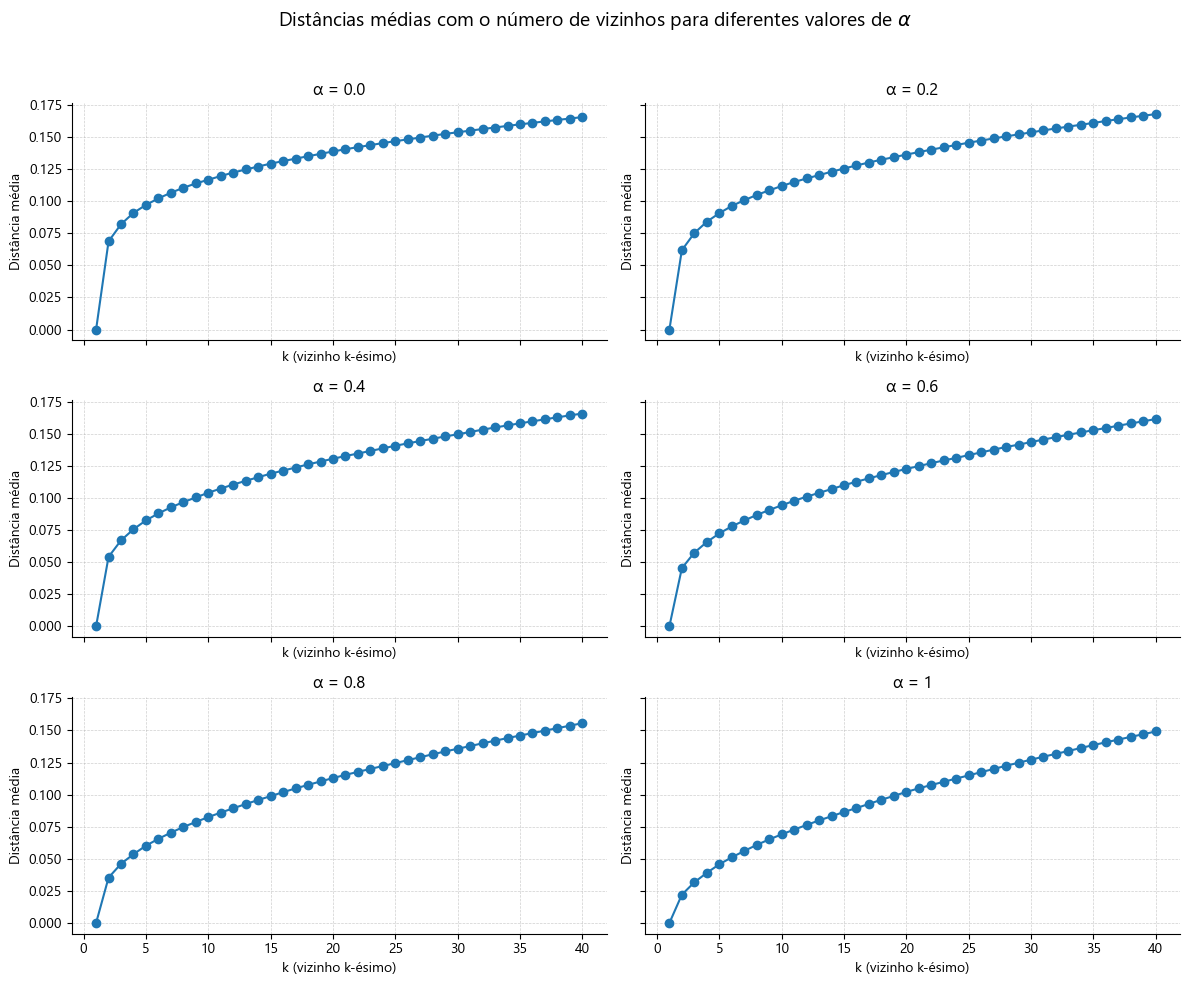

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import ndcg_score
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances

X_scaled = personagens[trait_cols].astype(float).values

D_cos = cosine_distances(X_scaled)
D_euc = euclidean_distances(X_scaled)
D_euc_norm = D_euc / D_euc.max()          # s√≥ normalizando

Kmax = 40
ks = range(1, Kmax + 1)
alphas = [0.0, 0.2, 0.4, 0.6, 0.8, 1]


fig, axes = plt.subplots(3, 2, figsize=(12, 10), sharex=True, sharey=True)
plt.rcParams['font.family'] = 'Segoe UI'

for idx, alpha in enumerate(alphas):
    D = alpha * D_cos + (1 - alpha) * D_euc_norm
    knn = NearestNeighbors(metric="precomputed", n_neighbors=Kmax).fit(D)
    dists, _ = knn.kneighbors(D, n_neighbors=Kmax)
    mean_dist = [dists[:, k - 1].mean() for k in ks]

    ax = axes[idx // 2, idx % 2]
    ax.plot(ks, mean_dist, marker="o")
    ax.set_title(f"Œ± = {alpha}")
    ax.set_xlabel("k (vizinho k-√©simo)")
    ax.set_ylabel("Dist√¢ncia m√©dia")
    sns.despine()
    ax.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5, alpha=0.6)

fig.suptitle(r"Dist√¢ncias m√©dias com o n√∫mero de vizinhos para diferentes valores de $\alpha$", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

- Usando a m√©trica h√≠brida $d_{\text{h√≠brido}}=\alpha\,d_{\text{cos}}+(1-\alpha)\,d_{\text{euc-norm}}$, observamos que a curva de dist√¢ncia m√©dia dobra em $k\!\approx\!6$ para $\alpha\le 0.5$. Isso indica que, al√©m do sexto vizinho, $\Delta d_k$ cresce quase linearmente, adicionando pouca similaridade real. 

    - Se $\alpha=0$ o algoritmo considera apenas a magnitude dos tra√ßos e descarta perfis com o mesmo ‚Äúformato‚Äù; 
    - Se $\alpha=1$ ele faz o oposto, equiparando usu√°rios extremos e medianos. 

- O valor $\alpha=0.5$ mant√©m equil√≠brio entre dire√ß√£o e intensidade ‚Äî preserva a proporcionalidade dos cinco fatores do Big¬†Five e ainda diferencia pontua√ß√µes muito altas ou muito baixas. Portanto, fixamos $\alpha=0.5$ no c√°lculo de $d_{\text{h√≠brido}}$ e restringimos a recomenda√ß√£o aos $k=6$ personagens mais pr√≥ximos, garantindo relev√¢ncia alta sem sobrecarregar o usu√°rio.


### Modelo Final


In [64]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances


trait_cols = ["Extrovers√£o", "Socializa√ß√£o", "Conscienciosidade",
              "Estabilidade emocional", "Abertura √† experi√™ncia"]

X = personagens[trait_cols].astype(float).values 
X_scaled = scaler.transform(X)

alpha = 0.5
D_cos = cosine_distances(X_scaled)              
D_euc = euclidean_distances(X_scaled)
D_euc_norm = D_euc / D_euc.max()                    

D = alpha * D_cos + (1 - alpha) * D_euc_norm

knn = NearestNeighbors(metric='precomputed', n_neighbors=6).fit(D)

max_euc = D_euc.max()   # necess√°rio para normalizar a euclidiana do usu√°rio


C:\Users\fealp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [65]:

def recommend(user_traits: dict, topk=6):
    # vetor do usu√°rio - padronizado
    u = np.array([[user_traits[c] for c in trait_cols]])
    # scaler m√°x e m√≠n igual feito no characters
    u_scaled = scaler.transform(u)

    # dist√¢ncias do usu√°rio para cada personagem
    d_cos_u = cosine_distances(u_scaled, X_scaled)[0]
    d_euc_u = euclidean_distances(u_scaled, X_scaled)[0] / max_euc
    d_u = alpha * d_cos_u + (1 - alpha) * d_euc_u

    # usa o KNN j√° treinado
    dists, idxs = knn.kneighbors(d_u.reshape(1, -1), n_neighbors=topk)

    recs = characters.iloc[idxs[0]].copy()
    recs["Proximidade"] = dists[0]
    
    return recs[["Personagem", "Universo",
                 "Extrovers√£o", "Socializa√ß√£o", "Conscienciosidade",
                 "Estabilidade emocional", "Abertura √† experi√™ncia",
                 "Proximidade"]]

user = {
    "Extrovers√£o": 49,
    "Socializa√ß√£o": 49,
    "Conscienciosidade": 44,
    "Estabilidade emocional": 39,
    "Abertura √† experi√™ncia": 47
}


recomendacoes = recommend(user)

user_row = {**user, "Personagem": "Usu√°rio", "Universo": "-", "Proximidade": "-"}
user_row_df = pd.DataFrame([user_row])
recomendacoes = pd.concat([user_row_df, recomendacoes], ignore_index=True)
recomendacoes = recomendacoes.reset_index(drop=True)
recomendacoes

C:\Users\fealp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Extrovers√£o  Socializa√ß√£o  Conscienciosidade  Estabilidade emocional  \
0    49.000000     49.000000          44.000000               39.000000   
1    35.381509     14.938368          32.353758               32.277099   
2    30.278107     33.957974          27.993873               23.785623   
3    32.977367     37.432083          27.345670               21.407125   
4    33.552737     25.134615          28.256373               27.363740   
5    32.448373     26.004409          25.767729               30.594656   
6    33.612500     24.042026          28.656209               25.632824   

   Abertura √† experi√™ncia           Personagem               Universo  \
0               47.000000              Usu√°rio                      -   
1               18.710592      Nelson Bighetti         Silicon Valley   
2               37.249372       Stanley Hudson             The Office   
3               35.538600  Squidward Tentacles  SpongeBob SquarePants   
4               28.974147               Kermit              Shameless   
5               32.828815    Mark Brendanawicz   Parks and Recreation   
6               27.147935           Adam Groff          Sex Education   

  Proximidade  
0           -  
1   14.926676  
2   14.932856  
3   14.937626  
4   14.946994  
5   14.952406  
6   14.957738

In [66]:
user = {
    "Extrovers√£o": 20,
    "Socializa√ß√£o": 40,
    "Conscienciosidade": 14,
    "Estabilidade emocional": 30,
    "Abertura √† experi√™ncia": 45
}
recomendacoes = recommend(user)

user_row = {**user, "Personagem": "Usu√°rio", "Universo": "-", "Proximidade": "-"}
user_row_df = pd.DataFrame([user_row])
recomendacoes = pd.concat([user_row_df, recomendacoes], ignore_index=True)
recomendacoes = recomendacoes.reset_index(drop=True)
recomendacoes

C:\Users\fealp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Extrovers√£o  Socializa√ß√£o  Conscienciosidade  Estabilidade emocional  \
0    20.000000     40.000000          14.000000               30.000000   
1    30.278107     33.957974          27.993873               23.785623   
2    32.977367     37.432083          27.345670               21.407125   
3    32.448373     26.004409          25.767729               30.594656   
4    22.948447     30.482176          27.700735               27.156743   
5    32.444379     24.455347          24.579085               27.786641   
6    31.963462     31.439493          26.901307               24.518830   

   Abertura √† experi√™ncia           Personagem                 Universo  \
0               45.000000              Usu√°rio                        -   
1               37.249372       Stanley Hudson               The Office   
2               35.538600  Squidward Tentacles    SpongeBob SquarePants   
3               32.828815    Mark Brendanawicz     Parks and Recreation   
4               32.788959                Tommy                Shameless   
5               34.313375        Niko Polastri              Killing Eve   
6               31.034560            Sam Healy  Orange is the New Black   

  Proximidade  
0           -  
1    9.401113  
2    9.409009  
3    9.416112  
4     9.43395  
5    9.434841  
6    9.437082

Observa que para dois users bem diferente tivemos alguns personagens em comum, o que pode estar acontecendo?